In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import datasets

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv("mnist_train.csv",header=None)
test = pd.read_csv("mnist_test.csv",header=None)
print(train, test)

       0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
0        5    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2        4    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4        9    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
59995    8    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59996    3    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59997    5    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59998    6    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59999    8    0    0    0    0    0    0    0    0    0  ...    0    0    0   

       778  779  780  781  782  783  784  
0       

In [3]:
train.shape

(60000, 785)

In [5]:
x_train = train.iloc[:,1:]
# iloc[start_row:end_row , start_col:end_col]

In [6]:
x_train.shape

(60000, 784)

In [7]:
y_train = train.iloc[:,0]

In [8]:
y_train.shape

(60000,)

In [9]:
x_test = test.iloc[:,1:]

In [10]:
y_test = test.iloc[:,0]

In [11]:
x_train.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# ((X_train, Y_train), (X_test, Y_test)) = datasets.mnist.load_data()

In [13]:
x_train.shape

(60000, 784)

In [14]:
# X_train = X_train.reshape(X_train.shape[0], 28*28*1)
# X_test = X_test.reshape(X_test.shape[0], 28*28*1)
# print(X_train)
# print(X_test)

In [15]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [16]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [17]:
y_test

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation ="relu"))
model.add(Dense(128, activation ="relu"))
model.add(Dense(10, activation ="softmax"))      

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
h = model.fit(x_train,y_train, epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2120 - accuracy: 0.9400 - val_loss: 0.1906 - val_accuracy: 0.9449
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1830 - accuracy: 0.9482 - val_loss: 0.1690 - val_accuracy: 0.9522
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1606 - accuracy: 0.9543 - val_loss: 0.1534 - val_accuracy: 0.9545
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1426 - accuracy: 0.9599 - val_loss: 0.1385 - val_accuracy: 0.9595
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1285 - accuracy: 0.9636 - val_loss: 0.1299 - val_accuracy: 0.9613
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1164 - accuracy: 0.9673 - val_loss: 0.1200 - val_accuracy: 0.9633
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1061 - accuracy: 0.9702 - val_loss: 0.1109 - val_accuracy:

In [27]:
prediction  = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [23]:
print(classification_report(prediction.argmax(axis=1), y_test.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1003
           1       0.98      0.97      0.98      1144
           2       0.93      0.93      0.93      1033
           3       0.93      0.93      0.93      1018
           4       0.95      0.94      0.94       991
           5       0.89      0.95      0.92       836
           6       0.96      0.94      0.95       978
           7       0.93      0.94      0.94      1022
           8       0.92      0.91      0.92       980
           9       0.92      0.93      0.93       995

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



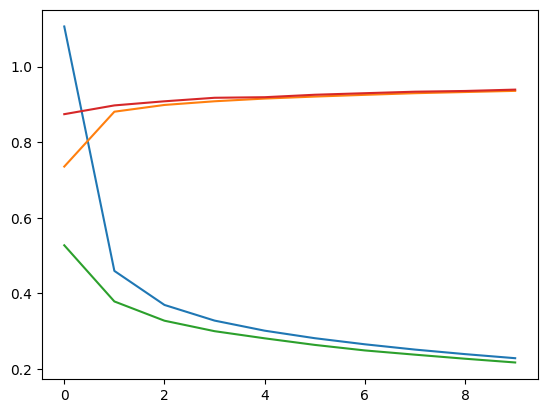

In [24]:
plt.figure()
epochs = 10
plt.plot(np.arange(0,epochs), h.history["loss"], label="train_loss")
plt.plot(np.arange(0,epochs), h.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0,epochs), h.history["val_loss"], label="test_loss")
plt.plot(np.arange(0,epochs), h.history["val_accuracy"], label="test_accuracy")